In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from scipy.stats import mode

In [6]:
iris = load_iris()
X,Y = load_iris(return_X_y=True)

In [7]:
X = scale(X)

In [11]:
max_clusters = 15
aciertos = np.zeros(max_clusters-2, dtype='float')
for k in range(3, max_clusters+1):
    clustering = AgglomerativeClustering(n_clusters=k)
    clustering.fit(X)
    moda = -1 * np.ones(k, dtype='int')
    for i in range(k):
        moda[i] = mode(Y[np.argwhere(clustering.labels_ == i)])[0].astype(int)
    y_predict = moda[clustering.labels_]
    aciertos[k-3] = accuracy_score(Y, y_predict)
    
    print(k, "->", aciertos[k-3])

3 -> 0.8266666666666667
4 -> 0.8333333333333334
5 -> 0.8333333333333334
6 -> 0.8333333333333334
7 -> 0.8333333333333334
8 -> 0.8333333333333334
9 -> 0.8333333333333334
10 -> 0.8933333333333333
11 -> 0.8933333333333333
12 -> 0.9266666666666666
13 -> 0.9266666666666666
14 -> 0.9333333333333333
15 -> 0.9333333333333333


In [14]:
import matplotlib
import matplotlib.pyplot as plt

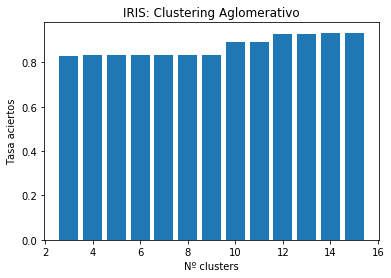

In [15]:
plt.bar(np.arange(3,max_clusters+1, dtype='int'),aciertos)
plt.title("IRIS: Clustering Aglomerativo")
plt.xlabel("Nº clusters")
plt.ylabel("Tasa aciertos")
plt.show()